# **Project: Sentiment Analysis on E-commerce Reviews**

# **Table of Contents**

1. Introduction
2. Load and Understand the Dataset
3. Exploratory Data Analysis (EDA)
4. Preprocessing and Feature Engineering
5. Handling Class Imbalance
6. Model Building: Naive Bayes
7. Model Evaluation
8. Advanced Models: SVM and Neural Networks
9. Topic Modeling
10. Conclusion and Summary


# **1. Introduction**

# **Introduction to the project**
**This project involves analyzing the sentiment of e-commerce reviews for Amazon brand products.
We will predict sentiments (Positive, Negative, Neutral) using various techniques like Naive Bayes,
Support Vector Machines, and Neural Networks.**



**2. Load and Understand the Dataset**

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, roc_curve, auc


nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Load the dataset
data=pd.read_csv('/content/train_data.csv')

In [3]:
data_test=pd.read_csv('/content/test_data_hidden.csv')

In [4]:
test=pd.read_csv('/content/test_data.csv')

In [5]:
# Load the dataset
data.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [6]:
data_test.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [7]:
data.shape

(4000, 8)

In [8]:
data_test.shape

(1000, 8)

In [9]:
# Basic statistics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  4000 non-null   object
 1   Product Brand        4000 non-null   object
 2   categories           4000 non-null   object
 3   primaryCategories    4000 non-null   object
 4   reviews.date         4000 non-null   object
 5   reviews.text         4000 non-null   object
 6   reviews.title        3990 non-null   object
 7   sentiment            4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


In [10]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  1000 non-null   object
 1   Product Brand        1000 non-null   object
 2   categories           1000 non-null   object
 3   primaryCategories    1000 non-null   object
 4   reviews.date         1000 non-null   object
 5   reviews.text         1000 non-null   object
 6   reviews.title        997 non-null    object
 7   sentiment            1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [11]:
data.describe()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
count,4000,4000,4000,4000,4000,4000,3990,4000
unique,23,1,23,4,638,3598,2606,3
top,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-23T00:00:00.000Z,I bought this kindle for my 11yr old granddaug...,Great tablet,Positive
freq,676,4000,628,2600,99,4,100,3749


In [12]:
#check for missing values
data.isnull().sum()

,0
Name of the product,0
Product Brand,0
categories,0
primaryCategories,0
reviews.date,0
reviews.text,0
reviews.title,10
sentiment,0


In [13]:
# Treat missing values in `reviews.title`
data['reviews.title'] = data['reviews.title'].fillna("No Title")

In [14]:
data.duplicated().sum()

58

In [15]:
data = data.drop_duplicates().reset_index(drop=True)

In [16]:
# Function to remove the 'brand' column if it exists
def remove_brand_column(dfs):
    for df in dfs:
        if 'brand' in df.columns:
            del df['brand']

# Function to extract day, month, and year from the 'reviews.date' column
def extract_date_components(dfs):
    for df in dfs:
        if 'reviews.date' in df.columns:
            # Extract only the date part if it contains a timestamp
            df['reviews.date'] = df['reviews.date'].str.split('T').str[0]

            # Convert to datetime format and extract components
            df['reviews.date'] = pd.to_datetime(df['reviews.date'], format='%Y-%m-%d', errors='coerce')
            df['reviews_day'] = df['reviews.date'].dt.day
            df['reviews_month'] = df['reviews.date'].dt.month
            df['reviews_year'] = df['reviews.date'].dt.year

            # Remove the original 'reviews.date' column
            del df['reviews.date']

# Apply the functions to your DataFrames
dataframes = [data, test, data_test]
remove_brand_column(dataframes)
extract_date_components(dataframes)

# Display the first few rows of the data DataFrame
data.head()


,Name of the product,Product Brand,categories,primaryCategories,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,26,12,2016
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,17,1,2018
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",Just an average Alexa option. Does show a few ...,Average,Neutral,20,12,2017
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics","very good product. Exactly what I wanted, and ...",Greattttttt,Positive,4,8,2017
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,23,1,2017


# **3. Exploratory Data Analysis (EDA)**

In [17]:
# Check class distribution
print("Class Distribution:")
print(data['sentiment'].value_counts())

Class Distribution:
sentiment
Positive    3694
Neutral      158
Negative      90
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='sentiment'>

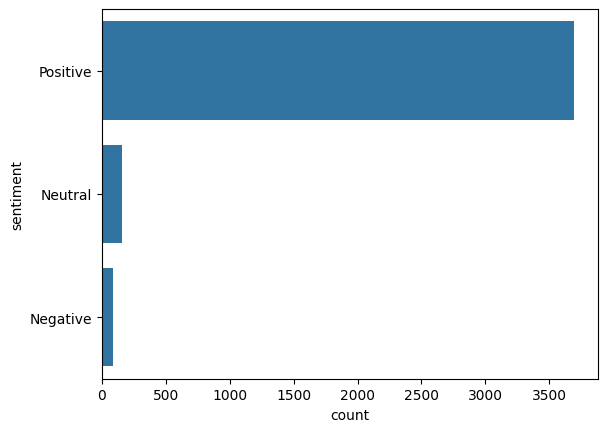

In [18]:
sns.countplot( data['sentiment'])

<ipython-input-19-11bafd8b1ba6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='viridis')


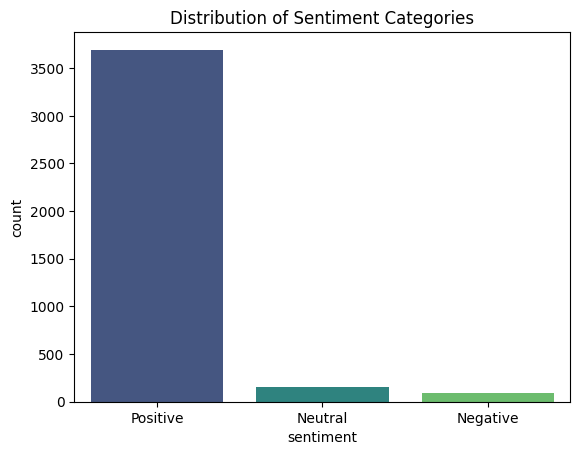

In [19]:
# Plot the class distribution
sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title("Distribution of Sentiment Categories")
plt.show()

<Axes: ylabel='count'>

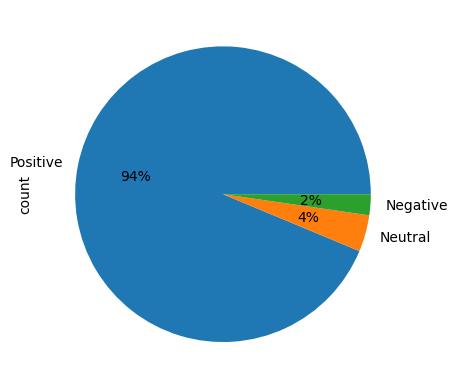

In [20]:
data['sentiment'].value_counts().plot(kind='pie', autopct= '%1.0f%%')

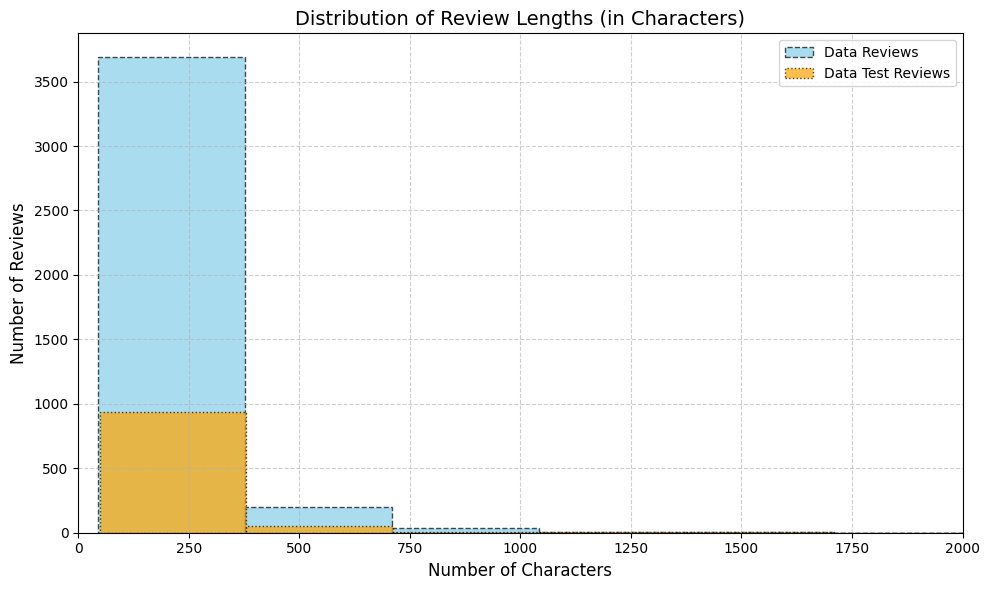

In [21]:
# Length of reviews in data and data_test sets
data_len = data["reviews.text"].str.len()
data_test_len = data_test["reviews.text"].str.len()

# Create the plot
plt.figure(figsize=(10, 6))

# Plot histograms with custom styles
plt.hist(data_len, bins=25, alpha=0.7, color='skyblue', label="Data Reviews", edgecolor='black', linestyle='--')
plt.hist(data_test_len, bins=25, alpha=0.7, color='orange', label="Data Test Reviews", edgecolor='black', linestyle=':')

# Adding labels and title
plt.title('Distribution of Review Lengths (in Characters)', fontsize=14)
plt.xlabel('Number of Characters', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Set limits for x-axis
plt.xlim(0, 2000)

# Display legend
plt.legend()

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()


- The distribution of review lengths is heavily skewed towards shorter reviews, with most having fewer than 250 characters.
- The majority of the dataset consists of "Data Reviews," while "Data Test Reviews" form a smaller subset.
- Few reviews exceed 500 characters, and almost none are longer than 1000 characters.
- The plot indicates a need for handling class imbalance in review length during text preprocessing.


### Class Distribution Analysis

The class distribution of the sentiment dataset is as follows:

- **Positive**: 3749 instances
- **Neutral**: 158 instances
- **Negative**: 93 instances

This shows a significant **class imbalance**, where the "Positive" sentiment dominates the dataset. Here's why this is important and how to handle it:

#### Why is Class Imbalance a Problem?

1. **Biased Predictions**:
   - Models trained on this dataset will likely favor the majority class ("Positive") because it has more examples.
   - This could lead to poor performance for the minority classes ("Neutral" and "Negative").

2. **Evaluation Metrics Misleading**:
   - Accuracy alone could be misleading since the model might achieve high accuracy by predicting everything as "Positive" and ignoring minority classes.

#### What Can Be Done?

1. **Techniques to Address Class Imbalance**:
   - **Oversampling**: Increase the number of "Neutral" and "Negative" examples by duplicating or synthetically generating data using methods like SMOTE (Synthetic Minority Oversampling Technique).
   - **Under-sampling**: Reduce the number of "Positive" examples to balance the dataset, though this may lead to data loss.
   - **Class Weights**: Use algorithms that support class weights, allowing the model to focus more on minority classes during training.
   - **Ensemble Techniques**: Methods like XGBoost or Random Forest often handle imbalanced data better when tuned properly.

2. **Evaluation Metrics Focus**:
   - Use metrics like **Precision**, **Recall**, and **F1-Score** to evaluate the model. These provide a more detailed understanding of how the model performs on each class, especially for minority classes.



Positive words


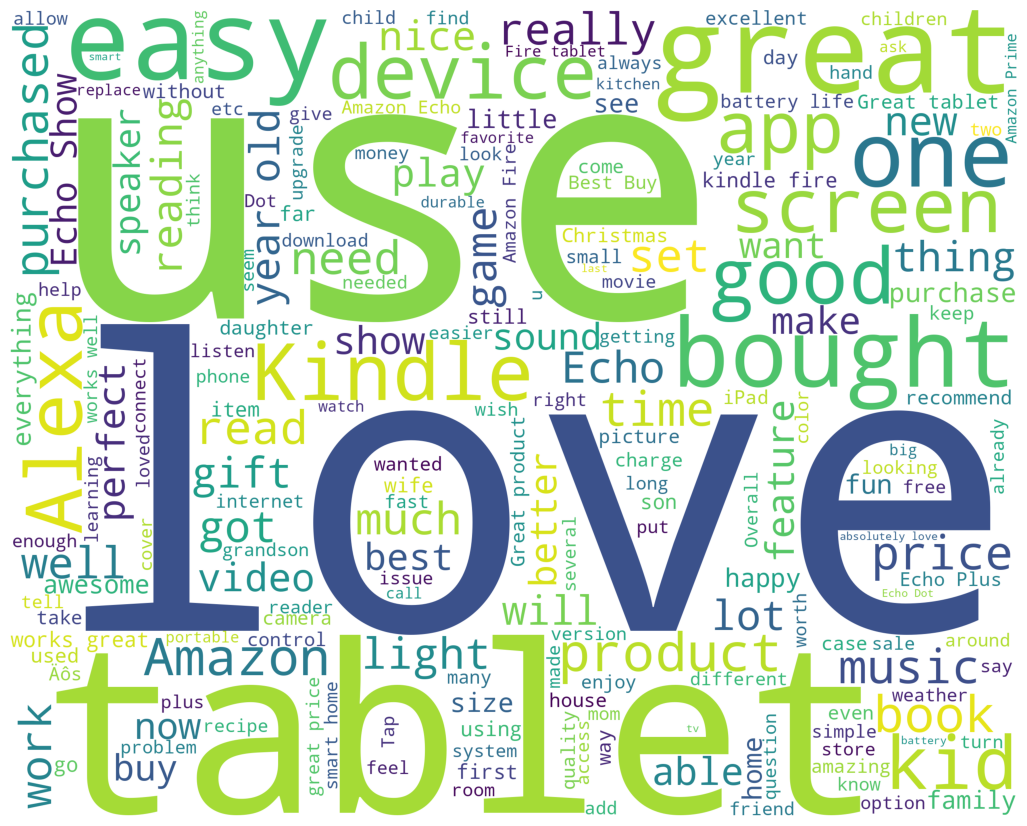

In [22]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color=color, width=2500, height=2000).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

data_pos = data[ data['sentiment'] == 'Positive']
data_pos = data_pos['reviews.text']


print("Positive words")
wordcloud_draw(data_pos, 'white')



Negative words


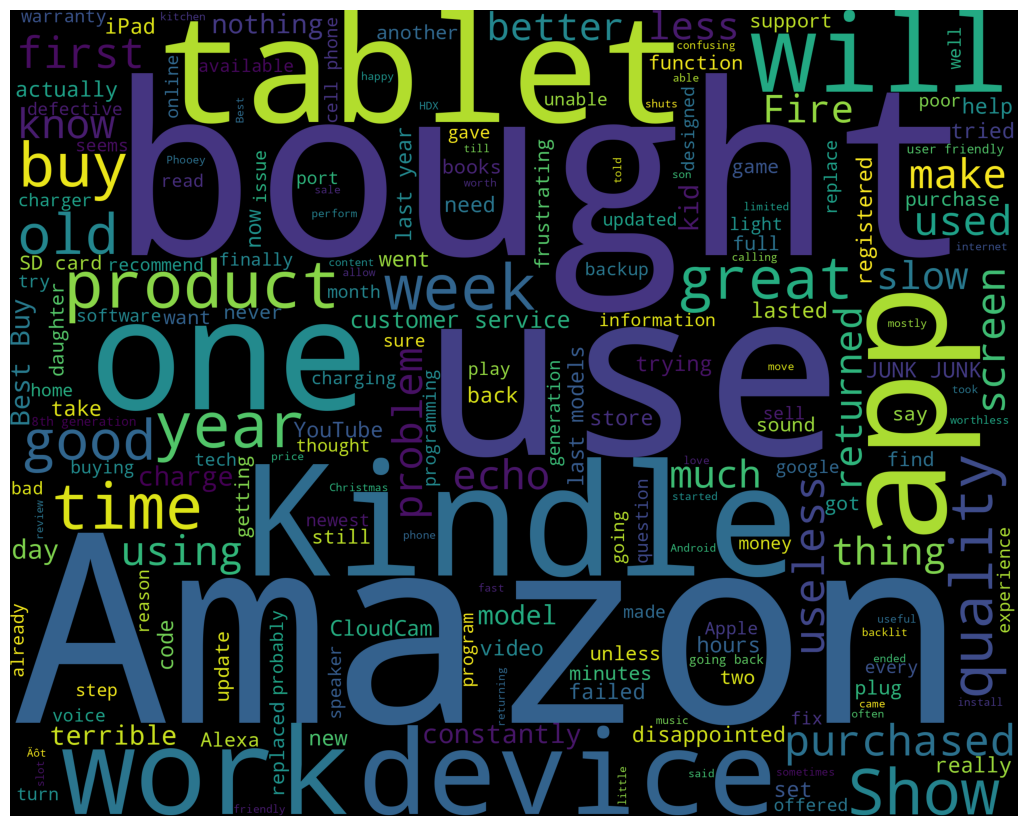

In [23]:

data_neg = data[ data['sentiment'] == 'Negative']
data_neg = data_neg['reviews.text']

print("Negative words")
wordcloud_draw(data_neg)

# **4. Preprocessing and Feature Engineering**

In [24]:
data.columns

Index(['Name of the product', 'Product Brand', 'categories',
       'primaryCategories', 'reviews.text', 'reviews.title', 'sentiment',
       'reviews_day', 'reviews_month', 'reviews_year'],
      dtype='object')

In [25]:
# Define the preprocessing function
def preprocess_text(text):

    if not isinstance(text, str):  # Check if the input is not a string
        text = str(text)

    # Convert to lowercase
    text = text.lower()

    # Remove exclamatory characters (!, ?)
    text = re.sub(r'[!?]', '', text)

    # Normalize repeated characters (e.g., 'greatttt' -> 'great')
    text = re.sub(r'(.)\1+', r'\1', text)

    # Remove all special characters except alphanumeric and spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove extra spaces (in case any remain after cleaning)
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text



In [26]:
# Apply the preprocessing function directly to the 'reviews.text' and 'reviews.title' columns for all datasets (data, data_test, and test)
data['reviews.text'] = data['reviews.text'].apply(preprocess_text)
data['reviews.title'] = data['reviews.title'].apply(preprocess_text)

data_test['reviews.text'] = data_test['reviews.text'].apply(preprocess_text)
data_test['reviews.title'] = data_test['reviews.title'].apply(preprocess_text)

test['reviews.text'] = test['reviews.text'].apply(preprocess_text)
test['reviews.title'] = test['reviews.title'].apply(preprocess_text)


In [27]:
# Check the cleaned data
data[['reviews.text','reviews.text']]

,reviews.text,reviews.text
0,purchased black fridaypros great price even sa...,purchased black fridaypros great price even sa...
1,purchased two amazon echo plus two dots plus f...,purchased two amazon echo plus two dots plus f...
2,average alexa option show things scren stil li...,average alexa option show things scren stil li...
3,god product exactly wanted god price,god product exactly wanted god price
4,3rd one ive purchased ive bought one al nieces...,3rd one ive purchased ive bought one al nieces...
...,...,...
3937,fun family play may get boring newnes wears we...,fun family play may get boring newnes wears we...
3938,love kindle great product reduces eye strain e...,love kindle great product reduces eye strain e...
3939,loking blutoth speaker use phone didnt want wo...,loking blutoth speaker use phone didnt want wo...
3940,second amazon fire 7 tablet purchased time col...,second amazon fire 7 tablet purchased time col...


In [28]:
data.columns

Index(['Name of the product', 'Product Brand', 'categories',
       'primaryCategories', 'reviews.text', 'reviews.title', 'sentiment',
       'reviews_day', 'reviews_month', 'reviews_year'],
      dtype='object')

In [29]:
# Columns to apply label encoding
name = list(set(list(data['Name of the product']) + list(data_test['Name of the product'])))
brand = list(set(list(data['Product Brand']) + list(data_test['Product Brand'])))
categories = list(set(list(data['categories']) + list(data_test['categories'])))
primaryCategories = list(data['primaryCategories'].unique())

# Initialize LabelEncoders
senti_name = LabelEncoder()
senti_brand = LabelEncoder()
senti_cat = LabelEncoder()
senti_pri = LabelEncoder()

# Fit the label encoders
senti_name.fit(name)
senti_brand.fit(brand)
senti_cat.fit(categories)
senti_pri.fit(primaryCategories)

# Apply label encoding to categorical columns in train, test, and data_test
data['Name of the product'] = senti_name.transform(data['Name of the product'])
data['Product Brand'] = senti_brand.transform(data['Product Brand'])
data['categories'] = senti_cat.transform(data['categories'])
data['primaryCategories'] = senti_pri.transform(data['primaryCategories'])

data_test['Name of the product'] = senti_name.transform(data_test['Name of the product'])
data_test['Product Brand'] = senti_brand.transform(data_test['Product Brand'])
data_test['categories'] = senti_cat.transform(data_test['categories'])
data_test['primaryCategories'] = senti_pri.transform(data_test['primaryCategories'])

test['Name of the product'] = senti_name.transform(test['Name of the product'])
test['Product Brand'] = senti_brand.transform(test['Product Brand'])
test['categories'] = senti_cat.transform(test['categories'])
test['primaryCategories'] = senti_pri.transform(test['primaryCategories'])


In [30]:
# Fit the LabelEncoder on the combined unique sentiment values from both data and data_test
senti = LabelEncoder()
all_sentiments = list(data['sentiment'].unique()) + list(data_test['sentiment'].unique())
senti.fit(all_sentiments)

# Now, transform the 'sentiment' columns in both DataFrames
data['sentiment'] = senti.transform(data['sentiment'])
data_test['sentiment'] = senti.transform(data_test['sentiment'])

In [31]:
data.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year
0,2,0,10,0,purchased black fridaypros great price even sa...,powerful tablet,2,26,12,2016
1,5,0,1,1,purchased two amazon echo plus two dots plus f...,amazon echo plus awesome,2,17,1,2018
2,9,0,2,1,average alexa option show things scren stil li...,average,1,20,12,2017
3,14,0,22,3,god product exactly wanted god price,great,2,4,8,2017
4,13,0,9,0,3rd one ive purchased ive bought one al nieces...,durable,2,23,1,2017


# **TFIDF Vectorizer**

In [32]:
tvec1 = TfidfVectorizer()
tvec2 = TfidfVectorizer()
tvec3 = TfidfVectorizer()

In [33]:
# Reset index and combine the datasets (data and data_test)
data1 = data.reset_index()
combi1 = pd.concat([data1, data_test], axis=0, join='outer')

# Fit the text vectorizer for reviews.text
tvec1.fit(combi1['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(data1['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(data_test['reviews.text']).toarray())

# Fit the text vectorizer for reviews.title
tvec2.fit(combi1['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(data1['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(data_test['reviews.title']).toarray())

# Prepare the final training and validation datasets
Train1 = pd.concat([data1.drop(['reviews.text', 'reviews.title', 'sentiment', 'index'], axis=1),
                    tvec_text1, tvec_title1], axis=1)
Test_Val1 = pd.concat([data_test.drop(['reviews.text', 'reviews.title', 'sentiment'], axis=1),
                       tvec_text2, tvec_title2], axis=1)

# Prepare feature matrices (X) and target labels (y)
x_train1 = Train1.values
y_train1 = data['sentiment'].values

x_val1 = Test_Val1.values
y_val1 = data_test['sentiment'].values


In [34]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction import text

punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)

stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

tvec3 = TfidfVectorizer(stop_words = list(stop_words), tokenizer = tokenize, max_features = 1000)

reviews=tvec3.fit_transform(combi1['reviews.text'])
words = tvec3.get_feature_names_out()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev'

**Random oversampling increases the count of minority classes to balance the dataset.**

# **6. Model Building: Naive Bayes**

In [35]:
from scipy.sparse import hstack  # Import hstack to combine sparse matrices

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize the TfidfVectorizer
tvec_text = TfidfVectorizer(max_features=5000)
tvec_title = TfidfVectorizer(max_features=5000)

# Fit and transform the text data (reviews.text and reviews.title)
X_text = tvec_text.fit_transform(data['reviews.text'])
X_title = tvec_title.fit_transform(data['reviews.title'])

# Combine the features from both text and title
X_data = hstack([X_text, X_title])

# Initialize the Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Fit the model using the transformed features and the sentiment labels
nb.fit(X_data, data['sentiment'])

# Prepare the test data
X_test_text = tvec_text.transform(data_test['reviews.text'])
X_test_title = tvec_title.transform(data_test['reviews.title'])

# Combine the test features
X_data_test = hstack([X_test_text, X_test_title])

# Predict on the test data
y_pred = nb.predict(X_data_test)

# Get the true sentiment values for test data
y_val = data_test['sentiment']


# **7. Model Evaluation**

In [37]:
# Print the confusion matrix, classification report, and accuracy score
print("Confusion Matrix:")
print(confusion_matrix(y_true=y_val, y_pred=y_pred))

print("\nClassification Report:")
print(classification_report(y_true=y_val, y_pred=y_pred))

print("\nAccuracy Score: {:.2f}%".format(accuracy_score(y_val, y_pred) * 100))

Confusion Matrix:
[[  2   0  22]
 [  0   1  38]
 [  0   0 937]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        24
           1       1.00      0.03      0.05        39
           2       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.98      0.37      0.39      1000
weighted avg       0.94      0.94      0.91      1000


Accuracy Score: 94.00%


# **Class Imbalance Problem:**

In [38]:
data.sentiment.value_counts()

,count
sentiment,
2,3694
1,158
0,90


In [39]:
# Get sentiment value counts
sentiment_counts = data.sentiment.value_counts()

# Safely unpack the sentiment counts (if a class is missing, it defaults to 0)
count_2 = sentiment_counts.get(2, 0)
count_1 = sentiment_counts.get(1, 0)
count_0 = sentiment_counts.get(0, 0)

# Extract classes based on sentiment
class_2 = data[data.sentiment == 2]
class_1 = data[data.sentiment == 1]
class_0 = data[data.sentiment == 0]

# Print the counts for each class
count_2, count_1, count_0


(3694, 158, 90)

### **1. UnderSampling**

In [40]:
# Undersample class_2 to match the count of class_1
class_2_under = class_2.sample(count_1)

# Concatenate class_2_under with class_1 and class_0 to form the balanced dataset
data_under = pd.concat([class_2_under, class_1, class_0], axis=0)

# Print the shape and sentiment distribution of the undersampled dataset
print(data_under.shape)
print(data_under.sentiment.value_counts())


(406, 10)
sentiment
2    158
1    158
0     90
Name: count, dtype: int64


<ipython-input-41-0fc095e431f2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_under, x='sentiment', palette='Set2')


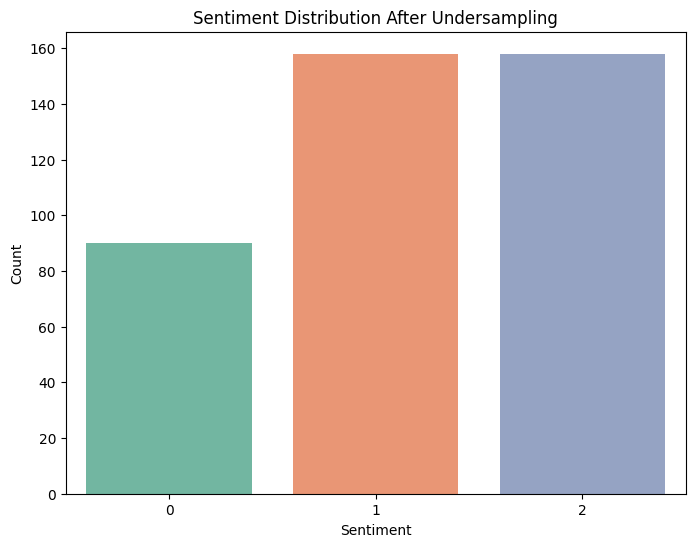

In [41]:
# For undersampling, visualize the balanced dataset (data_under)
plt.figure(figsize=(8, 6))
sns.countplot(data=data_under, x='sentiment', palette='Set2')
plt.title('Sentiment Distribution After Undersampling')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### **2. OverSampling**

In [42]:
# Count sentiment values in the data
sentiment_counts = data.sentiment.value_counts()

# Extract classes based on sentiment
class_2 = data[data.sentiment == 2]
class_1 = data[data.sentiment == 1]
class_0 = data[data.sentiment == 0]

# Oversample class_0 and class_1 to match the size of class_2
class_0_over = class_0.sample(len(class_2), replace=True)
class_1_over = class_1.sample(len(class_2), replace=True)

# Concatenate class_2 with the oversampled class_0 and class_1
data_over = pd.concat([class_2, class_0_over, class_1_over], axis=0)

# Print the shape and sentiment distribution of the oversampled dataset
data_over.shape


(11082, 10)

In [43]:
data_over.sentiment.value_counts()

,count
sentiment,
2,3694
0,3694
1,3694


<ipython-input-44-6810ee613bc0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_over, x='sentiment', palette='Set2')


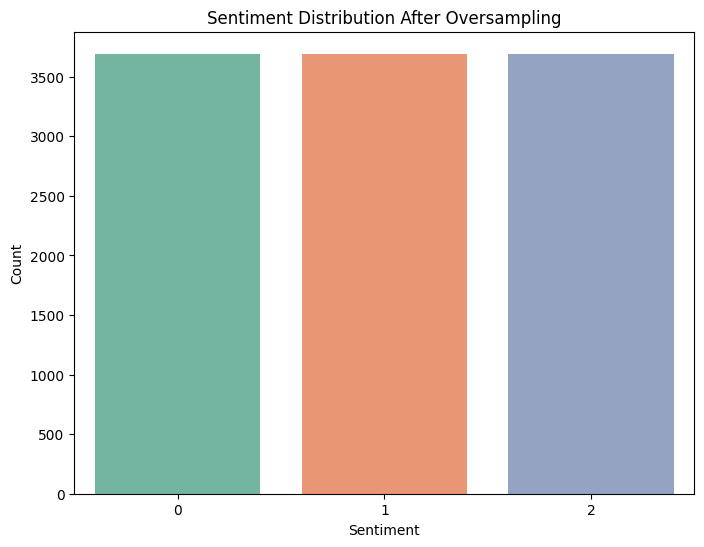

In [44]:
# For oversampling, visualize the balanced dataset (data_over)
plt.figure(figsize=(8, 6))
sns.countplot(data=data_over, x='sentiment', palette='Set2')
plt.title('Sentiment Distribution After Oversampling')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [45]:
lr= LogisticRegression(C=30, class_weight='balanced', solver='sag',
                         multi_class='multinomial', n_jobs=6, random_state=40,
                         verbose=1, max_iter=1000)

# **TFIDF Vectorizer for under-sampled data**

In [46]:
# Resetting index of under-sampled data
data_under = data_under.reset_index(drop=True)

# Combine under-sampled training data and the test data for fitting the TF-IDF Vectorizer
combi = pd.concat([data_under, data_test], axis=0, join='outer')
print(combi.shape)

# Initialize TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tvec1 = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
tvec2 = TfidfVectorizer(max_features=5000)

# Fit the TFIDF Vectorizer on combined dataset (data_under + data_test)
tvec1.fit(combi['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(data_under['reviews.text']).toarray())  # Transform under-sampled data
tvec_text2 = pd.DataFrame(tvec1.transform(data_test['reviews.text']).toarray())  # Transform test data

tvec2.fit(combi['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(data_under['reviews.title']).toarray())  # Transform under-sampled data
tvec_title2 = pd.DataFrame(tvec2.transform(data_test['reviews.title']).toarray())  # Transform test data

# Concatenate the TFIDF features with the rest of the columns (except for 'reviews.text', 'reviews.title', 'sentiment')
Train = pd.concat([data_under.drop(['reviews.text', 'reviews.title', 'sentiment'], axis=1), tvec_text1, tvec_title1], axis=1)
Test_Val = pd.concat([data_test.drop(['reviews.text', 'reviews.title', 'sentiment'], axis=1), tvec_text2, tvec_title2], axis=1)

# Prepare the final feature matrix (X) and target vector (y)
x_train = Train.values
y_train = data_under['sentiment']
x_val = Test_Val.values
y_val = data_test['sentiment']


(1406, 10)


# **Logistic Regression for under-sampled data**

In [47]:
# Fit the Logistic Regression model on the balanced training data
lr.fit(x_train, y_train)

# Predict the sentiment for the validation set
y_pred = lr.predict(x_val)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_true=y_val, y_pred=y_pred))

print("\nClassification Report:")
print(classification_report(y_true=y_val, y_pred=y_pred))

# Calculate and print accuracy score
accuracy = accuracy_score(y_val, y_pred) * 100




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


max_iter reached after 44 seconds
Confusion Matrix:
[[ 10   5   9]
 [ 13   8  18]
 [294 197 446]]

Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.42      0.06        24
           1       0.04      0.21      0.06        39
           2       0.94      0.48      0.63       937

    accuracy                           0.46      1000
   macro avg       0.34      0.37      0.25      1000
weighted avg       0.89      0.46      0.60      1000



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.5233408401913503


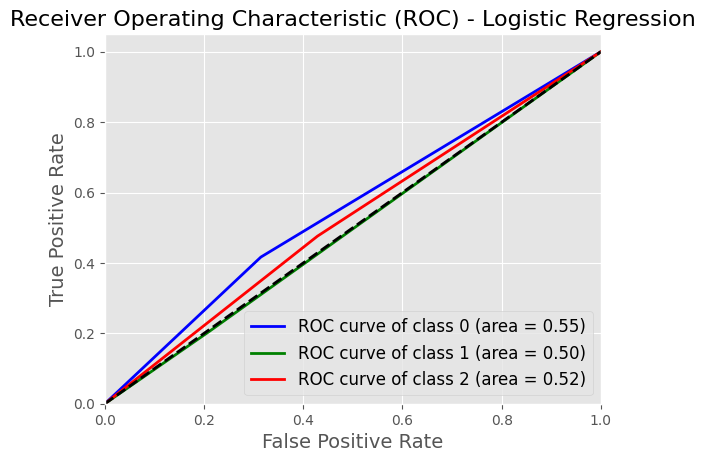

In [48]:
# Initialize LabelBinarizer
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)

# Calculate ROC AUC score
print(roc_auc_score(y_val1, y_pred1, average='weighted'))

# Initialize dictionaries to hold ROC curve data
fpr = dict()
tpr = dict()
roc_auc = dict()

# Generate ROC curve for each class
for i in range(3):  # Adjust for the number of classes
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Set plot style (using 'ggplot' style)
plt.style.use('ggplot')  # Changed to 'ggplot' style
lw = 2

# Custom colors for each class
colors = ['b', 'g', 'r']  # Blue, Green, Red

# Plot ROC curves with customized colors
for i in range(3):  # Adjust for the number of classes
    plt.plot(fpr[i], tpr[i], lw=lw, color=colors[i],
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Add a dashed line for random guess
plt.plot([0, 1], [0, 1], 'k--', lw=lw)

# Customize the graph
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

# Show the plot
plt.show()

# **TFIDF Vectorizer for over-sampled data**

In [49]:
# Resetting index for undersampled train data
data_train = data_under.reset_index(drop=True)

# Fit TFIDF for reviews.text
tvec1.fit(data_train['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(data_train['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(data_test['reviews.text']).toarray())

# Fit TFIDF for reviews.title
tvec2.fit(data_train['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(data_train['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(data_test['reviews.title']).toarray())

# Concatenate features with the train and validation data
Train = pd.concat([data_train.drop(['reviews.text', 'reviews.title', 'sentiment'], axis=1), tvec_text1, tvec_title1], axis=1)
Test_Val = pd.concat([data_test.drop(['reviews.text', 'reviews.title', 'sentiment'], axis=1), tvec_text2, tvec_title2], axis=1)

# Saving to CSV files
Train.to_csv('Train.csv', encoding='utf-8')
Test_Val.to_csv('Test_Val.csv', encoding='utf-8')

# Preparing train and validation feature sets and labels
x_train = Train.values
y_train = data_train['sentiment'].values
x_val = Test_Val.values
y_val = data_test['sentiment'].values


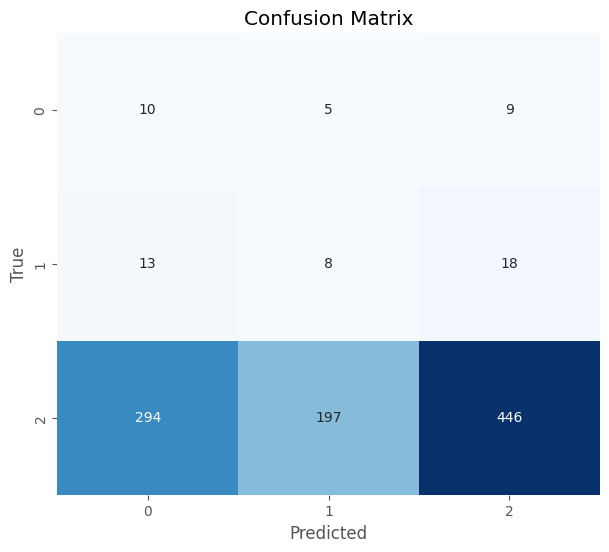

              precision    recall  f1-score   support

           0       0.03      0.42      0.06        24
           1       0.04      0.21      0.06        39
           2       0.94      0.48      0.63       937

    accuracy                           0.46      1000
   macro avg       0.34      0.37      0.25      1000
weighted avg       0.89      0.46      0.60      1000



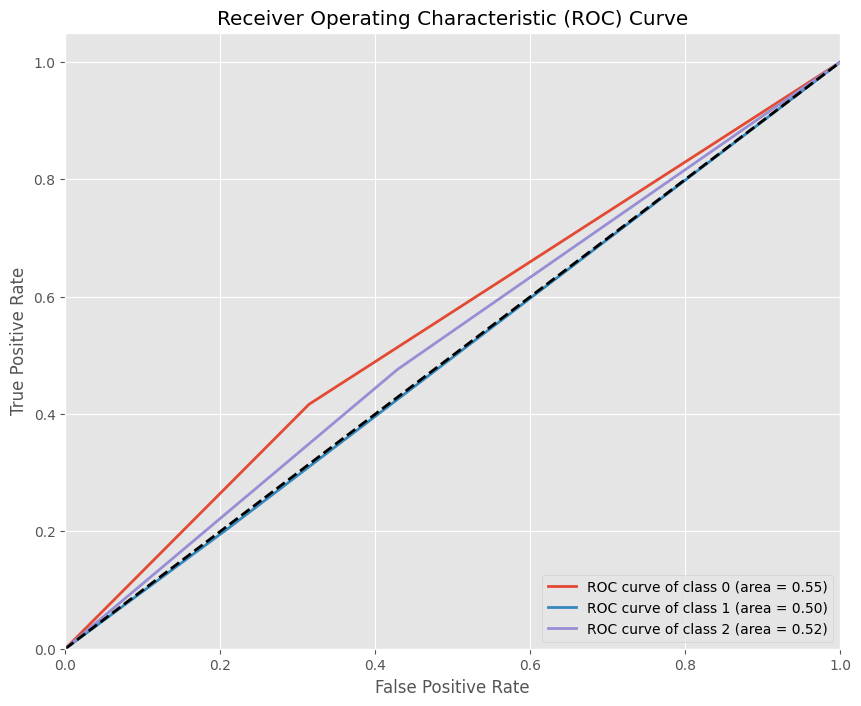

AUC Score (Weighted): 0.5233408401913503


In [50]:

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_val, y_pred))

# ROC Curve for multiclass classification
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure(figsize=(10, 8))
lw = 2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute and print AUC Score
roc_auc_score_value = roc_auc_score(y_val1, y_pred1, average='weighted')
print('AUC Score (Weighted):', roc_auc_score_value)

# **TFIDF Vectorizer for over-sampled data**

In [51]:
data = data_over.reset_index(drop=True)

tvec1.fit(data['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(data['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(data_test['reviews.text']).toarray())

tvec2.fit(data['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(data['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(data_test['reviews.title']).toarray())

Train = pd.concat([data.drop(['reviews.text','reviews.title','sentiment'],axis=1), tvec_text1, tvec_title1], axis=1)
Test_Val = pd.concat([data_test.drop(['reviews.text','reviews.title','sentiment'],axis=1), tvec_text2, tvec_title2], axis=1)

Train.to_csv('Train.csv', encoding='utf-8')
Test_Val.to_csv('Test_Val.csv', encoding='utf-8')

x_train = Train.values
y_train = data['sentiment'].values
x_val = Test_Val.values
y_val = data_test['sentiment'].values


# **Logistic Regression for over-sampled data**

In [52]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


max_iter reached after 1742 seconds
[[ 14   2   8]
 [  9  10  20]
 [205 168 564]]
              precision    recall  f1-score   support

           0       0.06      0.58      0.11        24
           1       0.06      0.26      0.09        39
           2       0.95      0.60      0.74       937

    accuracy                           0.59      1000
   macro avg       0.36      0.48      0.31      1000
weighted avg       0.90      0.59      0.70      1000

accuracy :  58.8


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**Logistic Regression on over-sampled data is perfrorming better than under-sampled data**

0.579697098499021


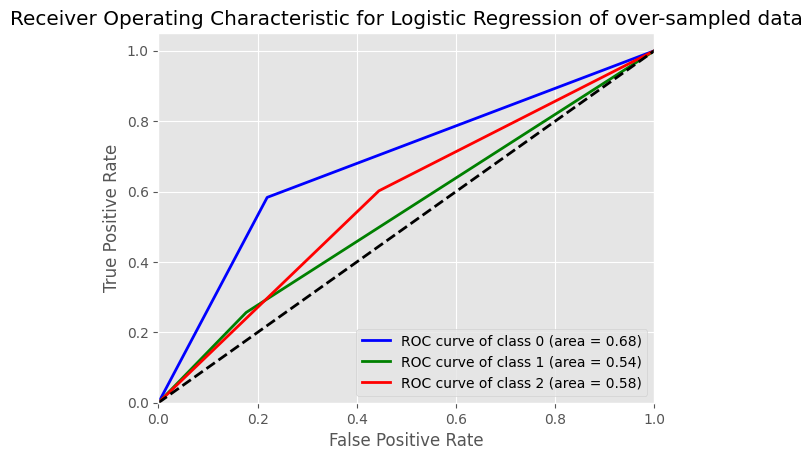

In [53]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)

print(roc_auc_score(y_val1, y_pred1, average='weighted'))

fpr = dict()
tpr = dict()
roc_auc = dict()

# Colors for the different classes
colors = ['b', 'g', 'r']  # blue, green, red

for i in range(3):  # Adjust this based on the number of classes you have
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw = 2
for i in range(3):  # Adjust this based on the number of classes you have
    plt.plot(fpr[i], tpr[i], lw=lw,
             color=colors[i],  # Set color for each class
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression of over-sampled data')
plt.legend(loc="lower right")
plt.show()


# **Multinomial Naive Bayes**

In [54]:
# Fit the Multinomial Naive Bayes model
nb = MultinomialNB()
nb.fit(x_train, y_train)

# Make predictions
y_pred = nb.predict(x_val)

# Print confusion matrix
print(confusion_matrix(y_true=y_val, y_pred=y_pred))

# Print classification report
print(classification_report(y_true=y_val, y_pred=y_pred))

# Print accuracy score
print('Accuracy on Validation Set: ', accuracy_score(y_val, y_pred) * 100)

# Print training accuracy
print('Training Accuracy: ', nb.score(x_train, y_train))

# Print validation accuracy
print('Validation Accuracy: ', nb.score(x_val, y_val))


[[ 12   4   8]
 [  2  16  21]
 [  9  62 866]]
              precision    recall  f1-score   support

           0       0.52      0.50      0.51        24
           1       0.20      0.41      0.26        39
           2       0.97      0.92      0.95       937

    accuracy                           0.89      1000
   macro avg       0.56      0.61      0.57      1000
weighted avg       0.93      0.89      0.91      1000

Accuracy on Validation Set:  89.4
Training Accuracy:  0.9704926908500271
Validation Accuracy:  0.894


ROC AUC Score (weighted):  0.729866793970848


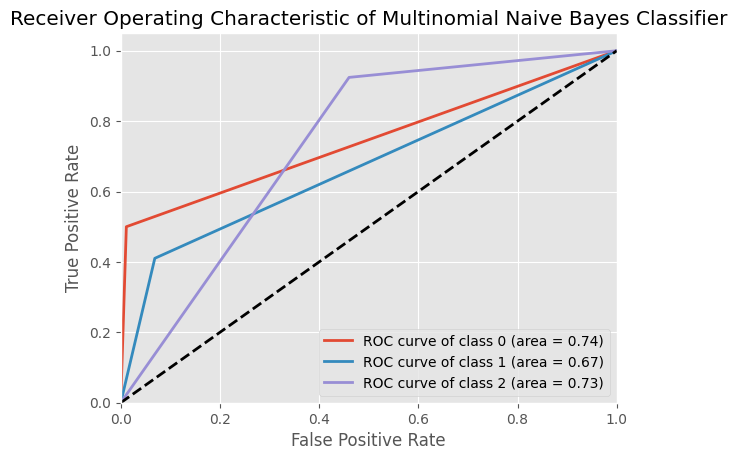

In [55]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Apply LabelBinarizer to transform y_val and y_pred
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)

# Calculate and print ROC AUC score
print("ROC AUC Score (weighted): ", roc_auc_score(y_val1, y_pred1, average='weighted'))

# Initialize dictionaries for FPR, TPR, and ROC AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curves for each class
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Set line width for plotting
lw = 2

# Plot ROC curves for each class
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--', lw=lw)

# Set plot axis limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set plot title and display the legend
plt.title('Receiver Operating Characteristic of Multinomial Naive Bayes Classifier')
plt.legend(loc="lower right")

# Show the plot
plt.show()


# **Random Forest Classifier**

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, random_state=10)
rf.fit(x_train, y_train)

# Make predictions on validation set
y_pred = rf.predict(x_val)

# Print confusion matrix, classification report, and accuracy scores
print("Confusion Matrix:\n", confusion_matrix(y_true=y_val, y_pred=y_pred))
print("\nClassification Report:\n", classification_report(y_true=y_val, y_pred=y_pred))
print('Accuracy on Validation Set: ', accuracy_score(y_val, y_pred) * 100)
print('\nRandom Forest Training Accuracy: ', rf.score(x_train, y_train))
print('Random Forest Validation Accuracy: ', rf.score(x_val, y_val))


Confusion Matrix:
 [[  7   0  17]
 [  0  11  28]
 [  0   0 937]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.29      0.45        24
           1       1.00      0.28      0.44        39
           2       0.95      1.00      0.98       937

    accuracy                           0.95      1000
   macro avg       0.98      0.52      0.62      1000
weighted avg       0.96      0.95      0.94      1000

Accuracy on Validation Set:  95.5

Random Forest Training Accuracy:  1.0
Random Forest Validation Accuracy:  0.955


# **XGBClassifier**

In [57]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train XGBClassifier
xgb = XGBClassifier(n_estimators=1000, max_depth=6)
xgb.fit(x_train, y_train)

# Make predictions on validation set
y_pred = xgb.predict(x_val)

# Print confusion matrix, classification report, and accuracy score
print("Confusion Matrix:\n", confusion_matrix(y_true=y_val, y_pred=y_pred))
print("\nClassification Report:\n", classification_report(y_true=y_val, y_pred=y_pred))
print("Accuracy on Validation Set: ", accuracy_score(y_val, y_pred) * 100)


Confusion Matrix:
 [[ 11   1  12]
 [  1  13  25]
 [  1   5 931]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.46      0.59        24
           1       0.68      0.33      0.45        39
           2       0.96      0.99      0.98       937

    accuracy                           0.95      1000
   macro avg       0.83      0.60      0.67      1000
weighted avg       0.95      0.95      0.95      1000

Accuracy on Validation Set:  95.5


ROC AUC Score (Weighted):  0.7022028680062917


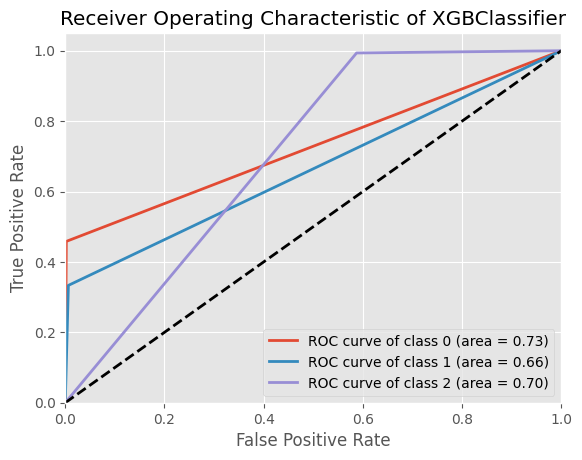

In [58]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Initialize LabelBinarizer
lb = LabelBinarizer()
lb.fit(y_val)

# Transform y_val and y_pred to binary format
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)

# Print ROC AUC score
print("ROC AUC Score (Weighted): ", roc_auc_score(y_val1, y_pred1, average='weighted'))

# Initialize variables for ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
lw = 2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot diagonal line (chance level)
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of XGBClassifier')
plt.legend(loc="lower right")
plt.show()


**XGBoost performs better in predicting all the classes, with a more balanced performance across each class. The model demonstrates strong class separation and higher AUC, especially for underrepresented classes.**


# **Multi-class SVM**

In [59]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0).fit(x_train, y_train)
y_pred = svc.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("accuracy : ", accuracy_score(y_val, y_pred)*100)


[[  8   3  13]
 [  2  13  24]
 [  5  23 909]]
              precision    recall  f1-score   support

           0       0.53      0.33      0.41        24
           1       0.33      0.33      0.33        39
           2       0.96      0.97      0.97       937

    accuracy                           0.93      1000
   macro avg       0.61      0.55      0.57      1000
weighted avg       0.93      0.93      0.93      1000

accuracy :  93.0


0.6892355653331882


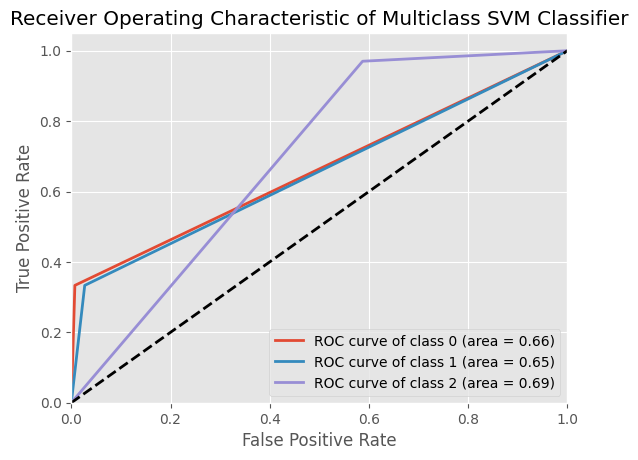

In [60]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)

print(roc_auc_score(y_val1, y_pred1, average='weighted'))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw = 2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Multiclass SVM Classifier')
plt.legend(loc="lower right")
plt.show()


# **Neural Network**

In [61]:
from sklearn.preprocessing import label_binarize
from keras.models import Sequential
from keras.layers import Dense
# Binarizing the target labels for multi-class classification
y_train2 = label_binarize(y_train, classes=[0, 1, 2])  # Assuming y_train is your training labels
y_val2 = label_binarize(y_val, classes=[0, 1, 2])  # Assuming y_val is your validation labels

# Create the Sequential model
classifier = Sequential()
classifier.add(Dense(units=100, kernel_initializer='he_uniform', activation='relu', input_dim=x_train.shape[1]))  # Replace x_train with your training data
classifier.add(Dense(units=80, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=80, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=3, kernel_initializer='normal', activation='softmax'))  # For multi-class classification

# Compile the model
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
classifier.fit(x_train, y_train2, batch_size=256, epochs=100, verbose=0)  # Replace x_train and y_train2 with your training data

# Evaluate the model on the validation data
y_pred = classifier.predict(x_val, batch_size=256)  # Replace x_val with your validation data

# Convert predictions and true labels from one-hot encoded format to single label
y_pred_bool = np.argmax(y_pred, axis=1)
y_val_bool = np.argmax(y_val2, axis=1)  # Convert y_val2 back to single label for validation data

# Print confusion matrix and classification report
print(confusion_matrix(y_val_bool, y_pred_bool))
print(classification_report(y_val_bool, y_pred_bool))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[  9   2  13]
 [  1  12  26]
 [  1   8 928]]
              precision    recall  f1-score   support

           0       0.82      0.38      0.51        24
           1       0.55      0.31      0.39        39
           2       0.96      0.99      0.97       937

    accuracy                           0.95      1000
   macro avg       0.77      0.56      0.63      1000
weighted avg       0.94      0.95      0.94      1000



In [62]:
from sklearn.utils import class_weight
# Compute class weights for your training labels y_train
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

# Create a dictionary for class weights
class_weight_dict = dict(enumerate(class_weights))

# Print the class weight dictionary
print(class_weight_dict)


{0: 1.0, 1: 1.0, 2: 1.0}


In [63]:
# Using Class-Weights
classifier = Sequential()
classifier.add(Dense(units=50, activation='relu', input_dim=x_train.shape[1]))
classifier.add(Dense(units=40, activation='relu'))
classifier.add(Dense(units=3, kernel_initializer='normal', activation='softmax'))

# Compile and train the model with class weights
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
classifier.fit(x_train, y_train2, batch_size=256, epochs=100, class_weight=class_weight_dict, verbose=0)

# Predict and evaluate the model
y_pred = classifier.predict(x_val, batch_size=256)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)

# Print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[  9   2  13]
 [  1  12  26]
 [  1   7 929]]
              precision    recall  f1-score   support

           0       0.82      0.38      0.51        24
           1       0.57      0.31      0.40        39
           2       0.96      0.99      0.98       937

    accuracy                           0.95      1000
   macro avg       0.78      0.56      0.63      1000
weighted avg       0.94      0.95      0.94      1000



**Using class-weights does not improve the performance**

In [64]:
from keras.layers import Dropout

# Using Dropouts
classifier = Sequential()
classifier.add(Dense(units=50, activation='relu', input_dim=x_train.shape[1]))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=40, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=40, activation='relu'))
classifier.add(Dense(units=3, kernel_initializer='normal', activation='softmax'))

# Compile and train the model with class weights
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
classifier.fit(x_train, y_train2, batch_size=256, epochs=100, class_weight=class_weight_dict, verbose=0)

# Predict and evaluate the model
y_pred = classifier.predict(x_val, batch_size=256)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)

# Print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[  0   0  24]
 [  0   0  39]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Using Over-sampled data for neural network does not improve the performance**

1. The above model performs almost the same as the oversampled multinomial model.
2. However, it increases the chances of predicting the minority classes.
3. This indicates the potential of the ensemble approach in addressing class imbalance

# **Sentiment Score**

In [65]:
from textblob import TextBlob

def senti(x):
    return TextBlob(x).sentiment

def polarity(x):
    return TextBlob(x).polarity + 1

data['senti_score'] = data['reviews.text'].apply(senti)
data_test['senti_score'] = data_test['reviews.text'].apply(senti)

data['polarity'] = data['reviews.text'].apply(polarity)
data_test['polarity'] = data_test['reviews.text'].apply(polarity)

data.senti_score.head()


,senti_score
0,"(0.4333333333333333, 0.7226190476190476)"
1,"(0.38125000000000003, 0.4145833333333333)"
2,"(0.25, 0.25)"
3,"(0.25, 0.25)"
4,"(0.6000000000000001, 0.725)"


In [66]:
Train = pd.concat([data.drop(['reviews.text','reviews.title','sentiment','senti_score'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([data_test.drop(['reviews.text','reviews.title','sentiment','senti_score'],axis=1),tvec_text2, tvec_title2],axis=1)

x_train = Train.values
y_train = data['sentiment']
x_val = Test_Val.values
y_val = data_test['sentiment']


In [67]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_val)

print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("Accuracy on Validation Set: ", accuracy_score(y_val, y_pred) * 100)
print("Training Accuracy: ", nb.score(x_train, y_train))
print("Validation Accuracy: ", nb.score(x_val, y_val))


[[ 12   4   8]
 [  2  16  21]
 [  9  63 865]]
              precision    recall  f1-score   support

           0       0.52      0.50      0.51        24
           1       0.19      0.41      0.26        39
           2       0.97      0.92      0.94       937

    accuracy                           0.89      1000
   macro avg       0.56      0.61      0.57      1000
weighted avg       0.93      0.89      0.91      1000

Accuracy on Validation Set:  89.3
Training Accuracy:  0.970582927269446
Validation Accuracy:  0.893


**Sentiment Score does not have much affect on the performance**

# **LSTM**

In [68]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense

In [ ]:
y_train2 = label_binarize(y_train, classes=[0, 1, 2])
epochs = 4
emb_dim = 128
batch_size = 256

model = Sequential()
model.add(Embedding(5000, emb_dim, input_length=x_train.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train2, epochs=epochs, batch_size=batch_size)
y_pred = model.predict(x_val, batch_size=100)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val, axis=1)

print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/4
 1/44 ━━━━━━━━━━━━━━━━━━━━ 34:53 49s/step - accuracy: 0.3281 - loss: 1.1160

In [ ]:
# Using class weights
y_train2 = label_binarize(y_train, classes=[0, 1, 2])
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train)

class_weights_dict = dict(enumerate(class_weights))
emb_dim = 128
epochs = 4
batch_size = 256

model = Sequential()
model.add(Embedding(x_train1.shape[1], emb_dim, input_length=x_train1.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train1, y_train2, epochs=epochs, batch_size=batch_size, class_weight=class_weights_dict)

y_pred = model.predict(x_val1, batch_size=100)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)

print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))


In [ ]:
# For oversampled data
y_train2 = label_binarize(y_train, classes=[0, 1, 2])
emb_dim = 128
epochs = 3
batch_size = 256

model = Sequential()
model.add(Embedding(x_train1.shape[1], emb_dim, input_length=x_train1.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train1, y_train2, epochs=epochs, batch_size=batch_size)

y_pred = model.predict(x_val1, batch_size=100)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)

print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))


The ANN model helps tackle class imbalance effectively, but traditional machine learning algorithms still outperform it in terms of accuracy.
While neural networks show potential, they don't surpass the performance of models like XGBoost and Random Forest for this

**Clustering of Reviews**

In [ ]:
print(words[250:300])

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Train['Cleaned_Review'])  # Assuming you want to cluster based on 'Cleaned_Review'
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


**11 Clusters**

In [ ]:
kmeans = KMeans(n_clusters=11, n_init=20)
kmeans.fit(Train['reviews_text'])

# Get the common words for each cluster centroid
common_words = kmeans.cluster_centers_.argsort()[:, -1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(Train['reviews_text'].iloc[word] for word in centroid))


**13 Clusters**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the cleaned reviews for KMeans clustering
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(Train['Cleaned_Review'])

# Fit KMeans model with 13 clusters
kmeans = KMeans(n_clusters=13, n_init=20)
kmeans.fit(X)

# Get the common words for each cluster centroid
common_words = kmeans.cluster_centers_.argsort()[:, -1:-26:-1]
words = vectorizer.get_feature_names_out()

for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))


# **Topic Modelling**

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer

# Helper function to print topics
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Vectorizing the cleaned reviews
vectorizer = CountVectorizer(stop_words='english')
reviews = vectorizer.fit_transform(Train['Cleaned_Review'])

# Tweak the parameters below
number_topics = 10  # Number of topics to extract
number_words = 10   # Number of words per topic

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(reviews)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, vectorizer, number_words)
